# Project: Investigate a Dataset - TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.It's very important to understand the factors which are important for the success of a movie. In this report I will ask questions to find out more about the trends and factors related to the success and failure of movies.

> 1. Which movies have generated most and least profit? 
2. Which movies have generated most and least revenue?
3. Which movies have consumed most and least budget?
4. Top 10 most popular movies among the audience - All Time?
5. How the revenue has been changed from year to year?
6. What number of movies are tagged in each of the genre? 
7.Which factors affect the revenue?


In [46]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> In this section, I will clean and wrangle the data, so that I can perform my analysis over the clean data.

>**We can see column names and get a general idea about them**

In [47]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('D:/Udacity/Data Analyst/Projects/Data Analysis_Project/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


>**Get an idea about the number of values in each column and data type of each column as well.**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>**Number of duplicate rows.**

In [49]:
df.duplicated().sum()

1

>**Number of rows and columns in the dataset.**

In [50]:
df.shape

(10866, 21)

In [52]:
df.replace(0, np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

### General Properties
> There are certain columns which needs to be removed, dupicate rows and null values should be dropped, finally data type needs to be updated.

### Data Cleaning
> 1. I will drop the following colums, as there is no use of these columns in my analysis
'imdb_id', 'homepage', 'tagline', 'keywords', 'Overview'
2. I will also drop duplicates
3. Drop the rows with null values
4. Finally I will handle the Column data type

>**I will drop the columns which are not directly relevant to my analysis.**

In [53]:
df.drop(columns = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


>**There is one duplicate row in the data and it's better to drop that row.**

In [54]:
df.drop_duplicates(inplace=True)

>**There are very less number of null values in the cast, director,and genres columns and that is why it is better to drop them. This will not impact my analysis.**

In [55]:
df.cast.dropna(inplace=True)
df.director.dropna(inplace=True)
df.genres.dropna(inplace=True)

>**release_date column is Str type and I am converting it to DateTime.**

In [56]:
df.release_date=pd.to_datetime(df.release_date)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  1. Which movies have generated most and least profit?

>**First we need to calculate the profit and add it as a new column in our dataframe**<br>
I have used revenue_adj and budgent_adj colums because they are adjusted for the inflation.

In [57]:
df['profit'] = df.revenue_adj - df.budget_adj
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


>**I have define a function which will calculate most and least values for different question**

In [64]:
''' 
most_least is a function to calculate the max and min values for different set of questions

Input: (column) - Takes column name for which you want to calculate the most max and min values
Return: (df_most) - rows for max and min

'''
def most_least(column):
    #first identify the record with max
    df_most = df[df[column] == df[column].max()]
    
    #Then identify the record with min
    df_least = df[df[column] == df[column].min()]
    
    df_most = df_most.append(df_least)
        
    #return
    return df_most

#Calling this function to find out most and least profit
print('The first record shows the details about movie which have generated most profit and \nsecond record shows the details about the movie with the lowest profit \n')
most_least('profit')

The first record shows the details about movie which have generated most profit and 
second record shows the details about the movie with the lowest profit 



,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
2244,46528,0.250540,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08


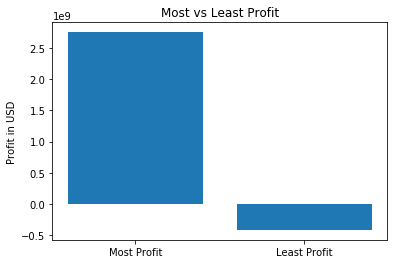

In [71]:
plt.bar([1,2], df_most.profit)
plt.xticks([1,2], ['Most Profit', 'Least Profit'])
plt.ylabel('Profit in USD')
plt.title('Most vs Least Profit')
plt.show()

### 2. Which movies have generated most and least revenue?

In [62]:
#Calling this function to find out most and least revenue
print('The first record shows the details about movie which have generated most revenue and \nsecond record shows the details about the movie with the lowest revenue \n')
most_least('revenue_adj')

The first record shows the details about movie which have generated most revenue and 
second record shows the details about the movie with the lowest revenue 



,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
5067,13537,0.462609,6000000.0,2.000000e+00,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94.0,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.4,2003,7.112116e+06,2.370705e+00,-7.112113e+06


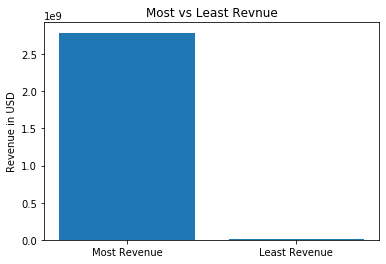

In [72]:
plt.bar([1,2], df_most.revenue_adj)
plt.xticks([1,2], ['Most Revenue', 'Least Revenue'])
plt.ylabel('Revenue in USD')
plt.title('Most vs Least Revnue')
plt.show()

### 2. Which movies have utilized most and least budget?

In [73]:
#Calling this function to find out most and least budget
print('The first record shows the details about movie which have utilized most budget and \nsecond record shows the details about the movie which utilized lowest budget \n')
most_least('budget_adj')

The first record shows the details about movie which have utilized most budget and 
second record shows the details about the movie which utilized lowest budget 



,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.250540,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,11087569.0,-413912431.0
1151,287524,0.177102,1.0,NaN,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Robert Hall,95.0,Horror,Dry County Films|Anchor Bay Entertainment|Movi...,2014-10-31,15,4.1,2014,9.210911e-01,NaN,NaN


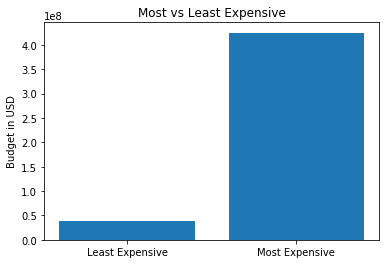

In [75]:
plt.bar([1,2], df_most.budget_adj)
plt.xticks([1,2], ['Least Expensive', 'Most Expensive'])
plt.ylabel('Budget in USD')
plt.title('Most vs Least Expensive')
plt.show()

### 4. Top 10 most popular movies among the audience - All Time?

In [90]:
top_ten=df.sort_values('popularity', ascending=False)[['original_title', 'popularity']].head(10)
top_ten

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


### 5. How the revenue has been changed from year to year?

In [96]:
rev_change=df.groupby('release_year')[['revenue_adj']].sum()
rev_change

,revenue_adj
release_year,
1960,1.069117e+09
1961,2.463622e+09
1962,1.553996e+09
1963,1.334357e+09
1964,2.397193e+09
1965,3.170185e+09
1966,5.692623e+08
1967,4.823051e+09
1968,1.659601e+09


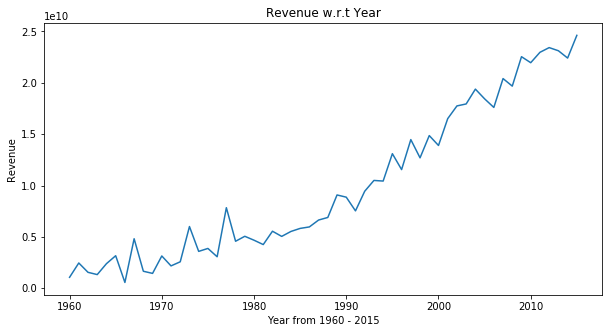

In [108]:
plt.figure(figsize=(10,5))
plt.plot(rev_change)
plt.xlabel('Year from 1960 - 2015')
plt.ylabel('Revenue')
plt.title('Revenue w.r.t Year')
plt.show()

In [198]:
rev_change.idxmax()

revenue_adj    2015
dtype: int64

>**It is very clear from the graph and query that revenue has increase from 1960 to 2015 and maximum revenue was recorded in year 2015**

### 6. What number of movies are tagged in each of the genre?

There are nan values in genre column. We have to replace it with some value (In our case it's 'No Value', as if will not replace them then code will throw an exception while calculating the count for each genre.

In [199]:
df.genres.isnull().sum()

0

There are 23 null values replace them with 'No Value' string

In [200]:
df.genres.fillna('No Value', inplace = True)
df.genres.isnull().sum()

0

>**This code creates a dict named result. Result holds the count for the number of movies which were tagged in a specific genre.**

In [191]:
#Create an empty dictionary
result = dict()

#Get the number of rows for the loop to run
rows,cols = df.shape

#This loop will traverse each of the row
for row in range(rows):
    #Split each of the genre value
    category=df.iloc[row]['genres'].split('|')
    #This loop will look into each of the value and create/update the counter in result dict
    for cat in range(len(category)):
        val=category[cat]
        result[val] = result.get(val, 0) + 1
       
#This is the final dict
result

{'Action': 2384,
 'Adventure': 1471,
 'Science Fiction': 1229,
 'Thriller': 2907,
 'Fantasy': 916,
 'Crime': 1354,
 'Western': 165,
 'Drama': 4760,
 'Family': 1231,
 'Animation': 699,
 'Comedy': 3793,
 'Mystery': 810,
 'Romance': 1712,
 'War': 270,
 'History': 334,
 'Music': 408,
 'Horror': 1637,
 'Documentary': 520,
 'TV Movie': 167,
 'No Value': 23,
 'Foreign': 188}

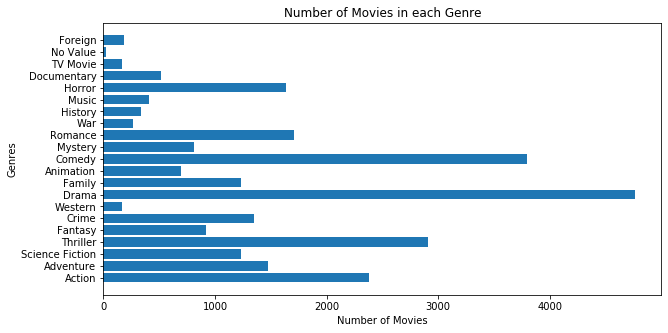

In [193]:
plt.figure(figsize=(10,5))
plt.barh(range(len(result)), list(result.values()), align='center')
plt.yticks(range(len(result)), list(result.keys()))
plt.title('Number of Movies in each Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

### Does popularity of a movie impact it's revenue?

>**It is better to calculate the pearson correlation coefficent to find out which factors effect the revenue**<br> *Note: I have used revenue_adj instead of revenue as revenue_adj is adjusted for inflation.* 

In [13]:
pearsoncorr=df.corr(method='pearson')

>**I have generated a heat map to visualize the impact**

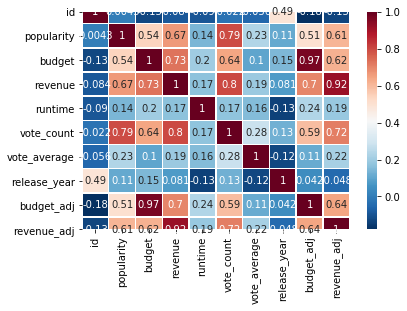

In [14]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

>**From the heat map it is clear that vote_count has strong positive correlation with revenue_adj, so I have plotted this relationship and it's clear that vote_count and revenue_adj holds a strong positive correlation**

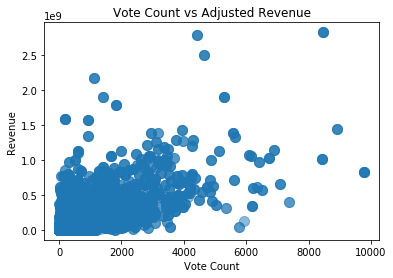

In [15]:
plt.scatter(df.vote_count, df.revenue_adj, s=100, alpha = 0.5)
plt.title('Vote Count vs Adjusted Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.show()

>**Now checking the relationship between populaity and adjusted revenue. It is evident that there is a positive correlation between the two.**

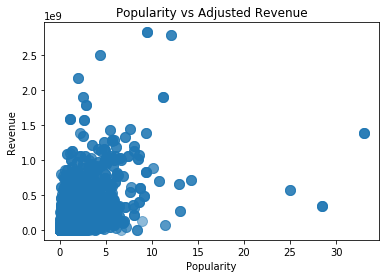

In [16]:
plt.scatter(df.popularity, df.revenue_adj, s=100, alpha = 0.5)
plt.title('Popularity vs Adjusted Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

### Does Budget of a movie impact it's revenue?

>**Our above heat map shows that there is a strong positive correlation between budget_adj and revenue_adj. This is also clear from the below scatter plot**

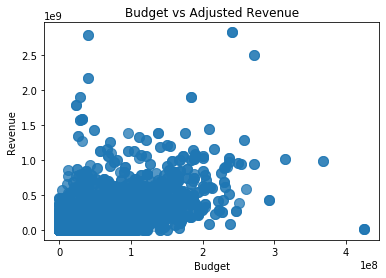

In [19]:
plt.scatter(df.budget_adj, df.revenue_adj, s=100, alpha = 0.5)
plt.title('Budget vs Adjusted Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

### Which movie have generated the most revenue?

> **To calculate the name of a movie which generated the most revenue. First filter on max revenue and then get the name of the movie. I have to get a single record using head(1) because we have divided the rows to handle multiple values in the genres column.**

In [24]:
df[df.revenue_adj == df.revenue_adj.max()].original_title.head(1)

1386    Avatar
Name: original_title, dtype: object

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])